**import the libraires**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**loading the dataset**

In [3]:
df=sns.load_dataset("mpg")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.drop(["name"],axis=1,inplace=True)

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**summery of the dataset**

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


** data preprocessing**

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [10]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [11]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [14]:
df.shape


(392, 8)

**univariable analysis**

In [15]:
df.cylinders.unique()

array([8, 4, 6, 3, 5])

In [16]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

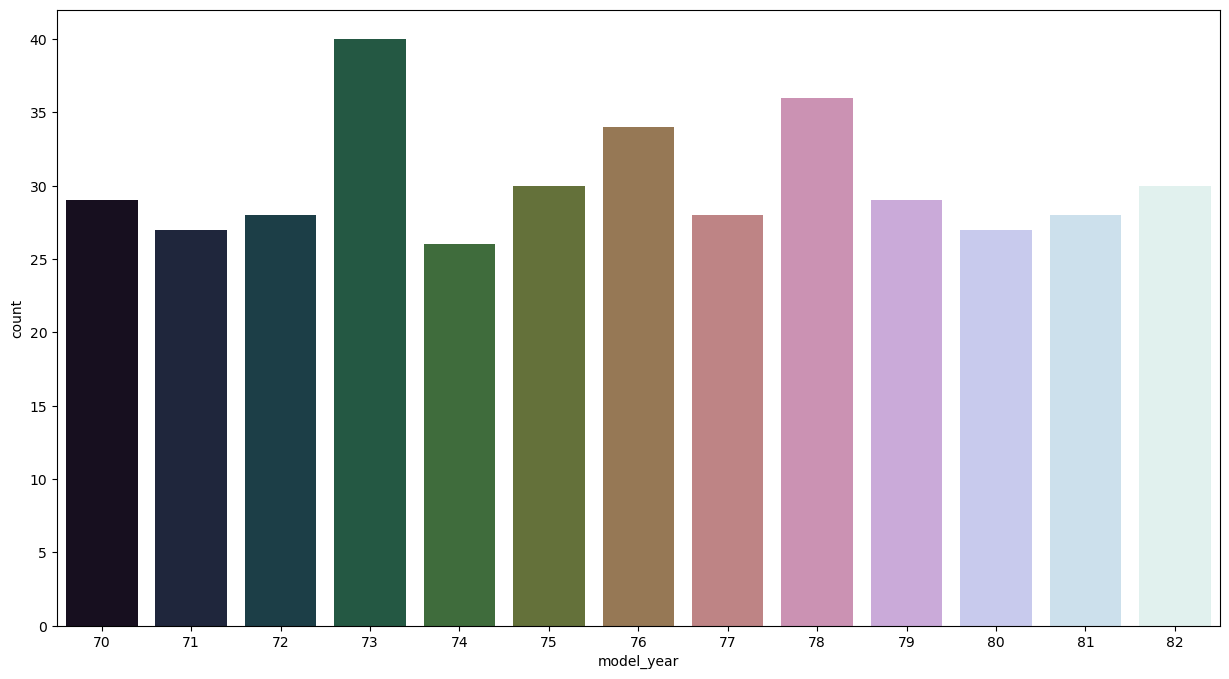

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x=df["model_year"],data=df,palette="cubehelix")
plt.show()

In [37]:
df["model_year"]=(1900+df.model_year)

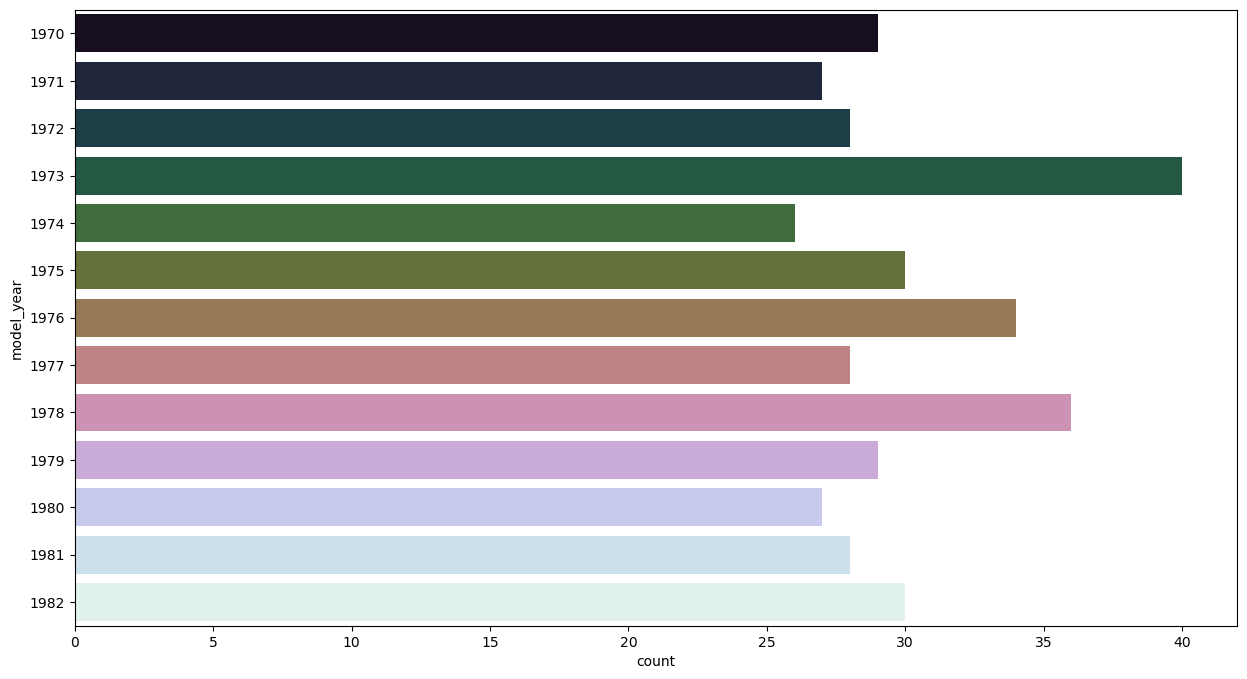

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(y=df["model_year"],data=df,palette="cubehelix")
plt.show()

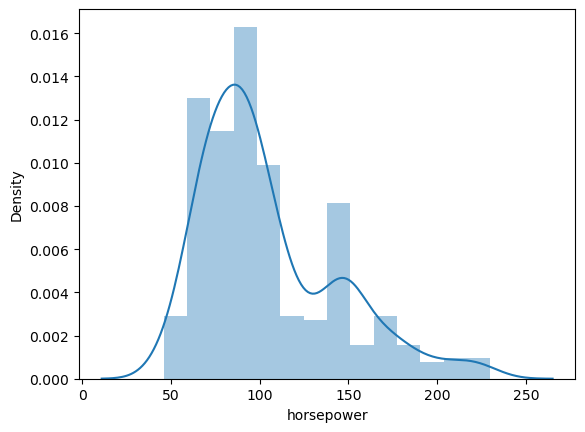

In [41]:
sns.distplot(df["horsepower"])
plt.show()

** Bivariate Analysis**

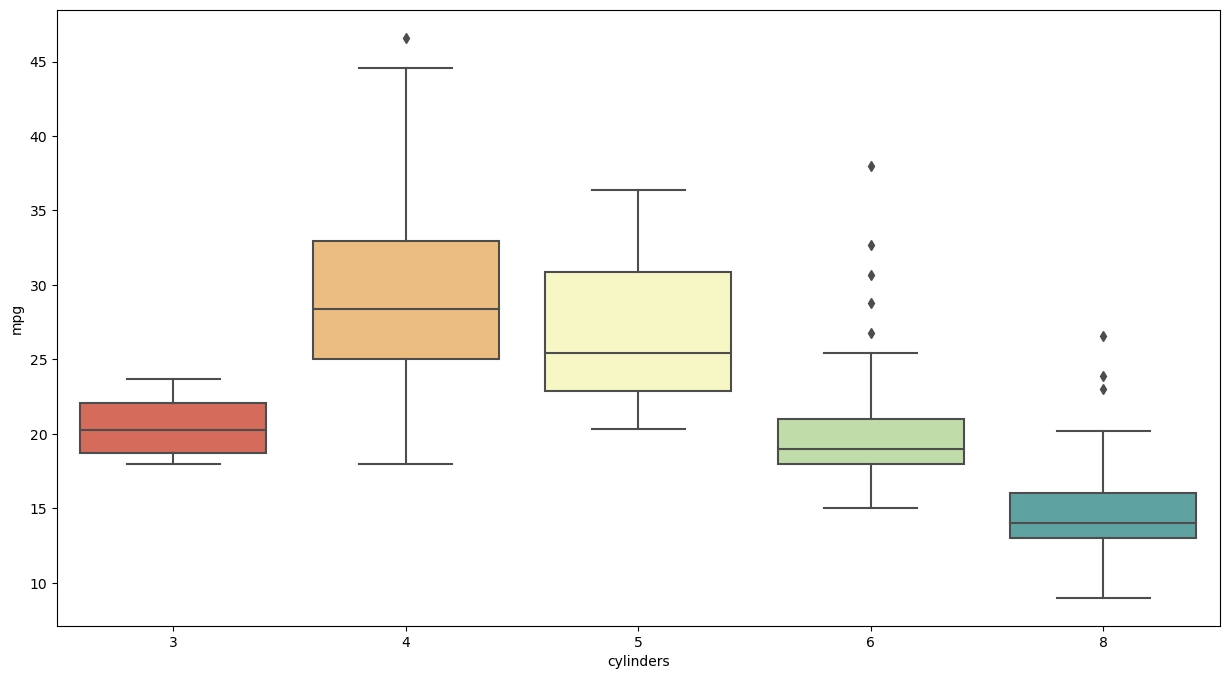

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x=df["cylinders"],y=df["mpg"],palette="Spectral")
plt.show()

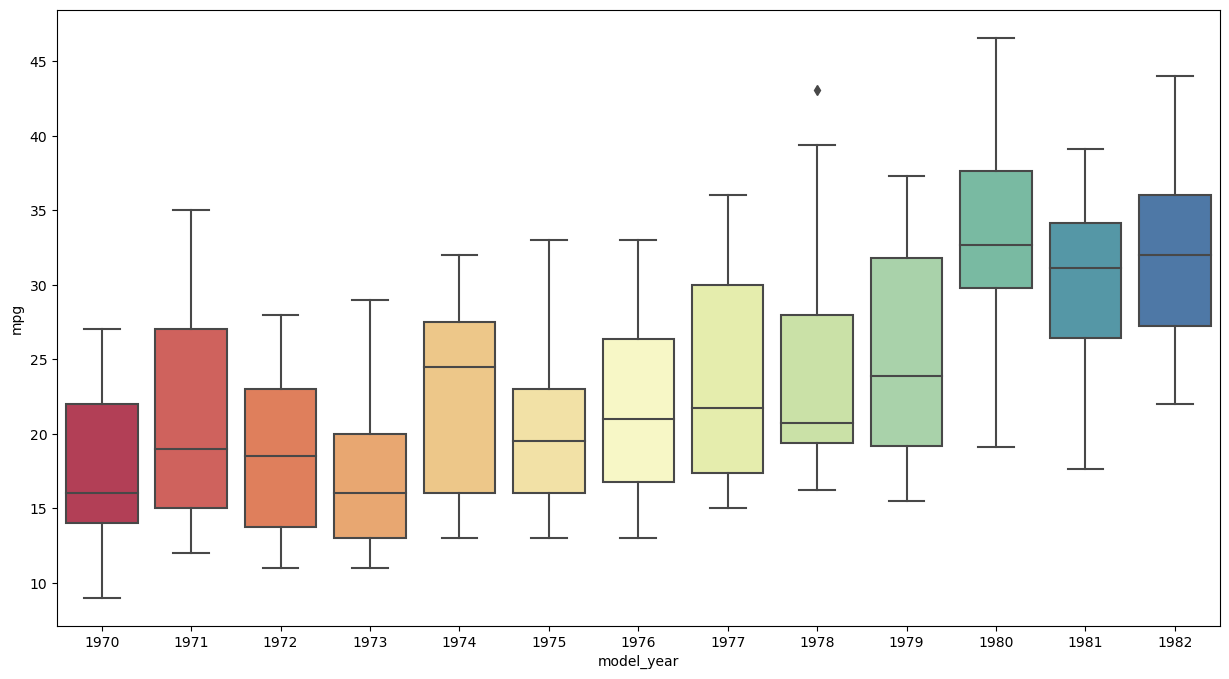

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x=df["model_year"],y=df["mpg"],palette="Spectral")
plt.show()

**multivariable analysis**

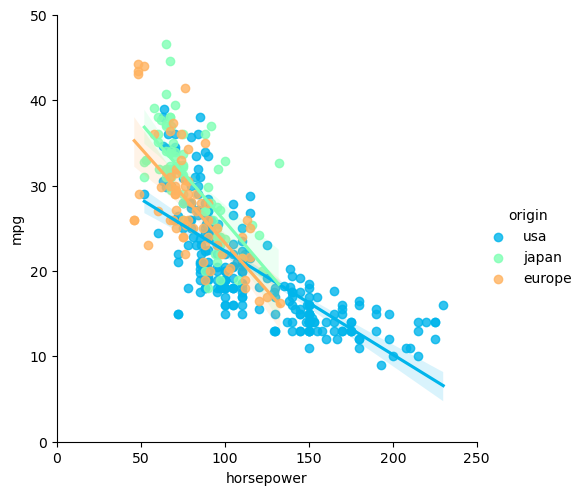

In [52]:
graph=sns.lmplot(data=df,x="horsepower",y="mpg",hue="origin",palette="rainbow")
graph.set(xlim=(0,250))
graph.set(ylim=(0,50))
plt.show()

** heatmap of the Correaltion matrix**

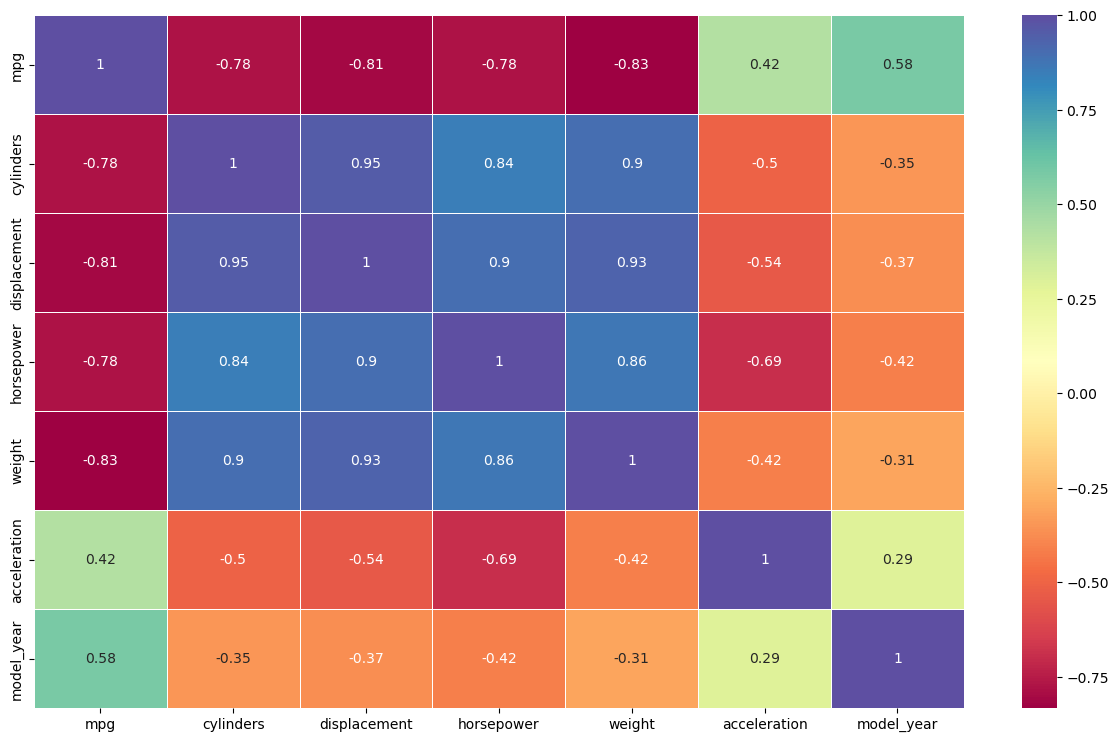

In [54]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap="Spectral")
plt.show()

In [55]:
df.drop(["acceleration","displacement"],axis=1,inplace=True)

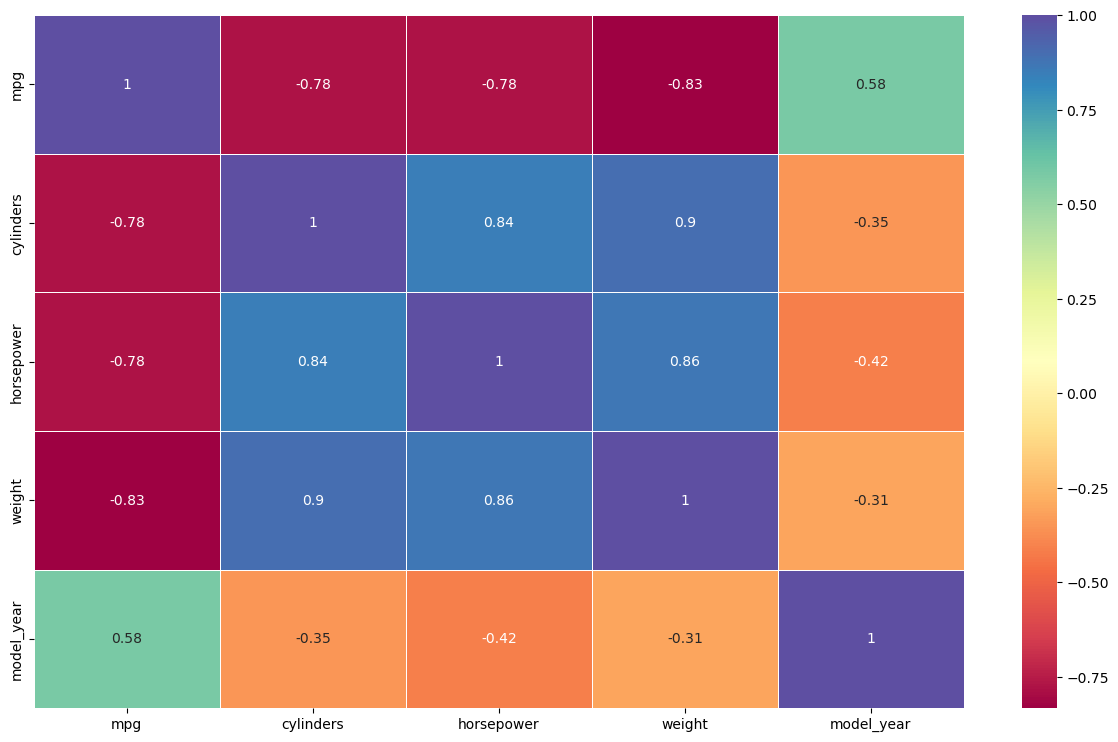

In [56]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap="Spectral")
plt.show()

**date and time**

In [58]:
from datetime import datetime
today=datetime.today()


In [59]:
today

datetime.datetime(2024, 2, 4, 18, 53, 43, 782103)

In [60]:
today.year

2024

In [61]:
this_year=today.year

In [62]:
this_year

2024

In [63]:
df["age"]=this_year-df.model_year

In [64]:
df.drop(["model_year"],axis=1,inplace=True)

In [65]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [66]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [71]:
df= pd.get_dummies(df,drop_first=True)

In [72]:
df

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,1
394,44.0,4,52.0,2130,42,0,0
395,32.0,4,84.0,2295,42,0,1
396,28.0,4,79.0,2625,42,0,1


**modelling**

In [73]:
x= df.drop(["mpg"],axis=1)
y=df["mpg"]

In [75]:
from sklearn.model_selection import train_test_split


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [78]:
x_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,46,0,1
184,4,92.0,2572,48,0,1
174,6,97.0,2984,49,0,1
64,8,150.0,4135,52,0,1
344,4,64.0,1875,43,0,1
...,...,...,...,...,...,...
72,8,150.0,3892,52,0,1
107,6,100.0,2789,51,0,1
272,4,85.0,2855,46,0,1
352,4,65.0,2380,43,0,1


In [79]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [81]:
from sklearn.linear_model import LinearRegression

In [84]:
lm_model=LinearRegression()

In [85]:
lm_model.fit(x_train,y_train)

LinearRegression()

In [87]:
lm_model.intercept_

79.80442103966979

In [91]:
coef_param=pd.DataFrame(lm_model.coef_,index=x.columns,columns=["Coefficient"])
coef_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [92]:
y_pred=lm_model.predict(x_test)

In [93]:
y_pred

array([26.54517421, 27.10231267, 33.98228639, 24.70664728, 28.27566369,
       30.1765714 ,  8.11519194, 30.32629444, 20.37965446, 29.45264374,
       12.18554756, 25.6760638 , 16.77792925, 29.30500437, 23.73057197,
       29.30722869, 20.52783528, 32.9589534 , 26.7082771 , 30.73400414,
       18.9492977 , 34.92264841, 35.14900786, 15.01631255, 29.42800412,
       26.59268508, 21.76475948, 16.11604977, 29.01957127, 24.60146333,
       13.34142484, 23.09944227, 21.52754347, 31.3403537 , 11.57340894,
       35.8857656 , 11.49790749, 24.36547976, 11.90884754,  7.44935735,
       13.17314238, 28.48416952, 35.47084837, 27.34178886, 12.05582117,
        9.10159978, 17.08620349, 32.34251061, 23.68307206, 31.09433673,
       11.74713777, 26.06944415, 22.65355802, 34.64349824, 28.05626653,
       17.2793678 , 20.81997137, 22.31406343, 23.55207772, 25.57598588,
        7.72272654, 22.25574874, 26.44752998, 24.21636598, 29.39111579,
       29.31748317, 25.52878565, 30.31443243, 22.33471971,  9.25

In [95]:
my_dict={"Actual" : y_test,"Pred" :y_pred}

In [96]:
compare=pd.DataFrame(my_dict)

In [97]:
compare.sample(10)

,Actual,Pred
9,15.0,12.185548
47,19.0,17.086203
139,14.0,11.497907
270,21.1,29.391116
117,29.0,29.452644
83,28.0,24.147781
15,22.0,18.949298
79,26.0,26.545174
56,26.0,24.706647
241,22.0,27.270363


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [99]:
def evalution_metrics(actual,pred):
    MAE= mean_absolute_error(actual,pred)
    MSE=mean_squared_error(actual,pred)
    RMSE=np.sqrt(mean_squared_error(actual,pred))
    SCORE=r2_score(actual,pred)
    return print("r2_score :",SCORE,"\n","mae:" ,MAE,"\n","mse:",MSE,"\n","rmse:",RMSE)

In [101]:
evalution_metrics(y_test,y_pred)

r2_score : 0.7798249880881915 
 mae: 2.5188281576150846 
 mse: 11.23786102282302 
 rmse: 3.352291905968664


In [102]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.6 MB/s eta 0:00:00a 0:00:01


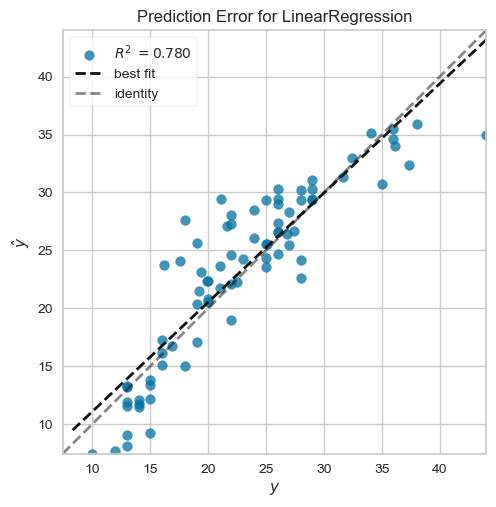

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [103]:
from yellowbrick.regressor import PredictionError

visualizer=PredictionError(lm_model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()

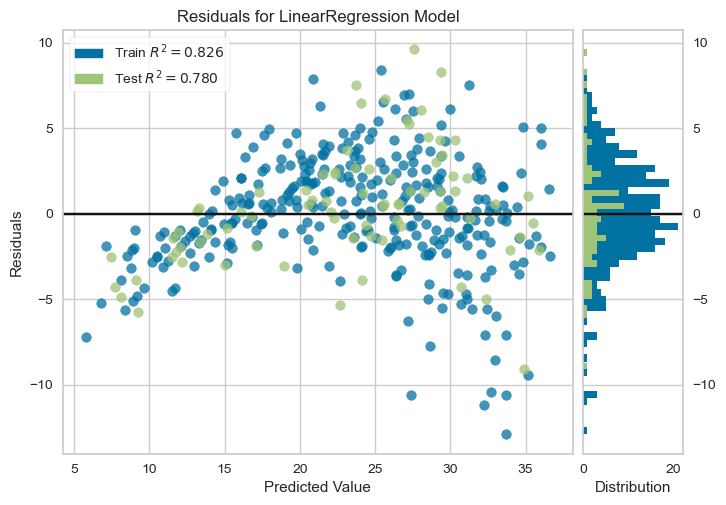

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [104]:
from yellowbrick.regressor import ResidualsPlot

visualizer=ResidualsPlot(lm_model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()